In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6287797709069598012, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17539095112270078991
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10052376501328999198
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2587451862425784560
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import numpy as np
import cv2
import imutils
from imutils import face_utils
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import dlib
import os
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import sys
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

In [0]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # 2. Load a file by ID and create local file.
# FGD = drive.CreateFile({'id':'1ZLMHuoqDINg8aKoXKF8gF5yM26L6QUNV'}) # replace fileid with Id of file you want to access
# Dataset1 = FGD.GetContentFile('Dataset1')


In [0]:
# # Install the PyDrive wrapper & import libraries.
# # This only needs to be done once per notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # Download a file based on its file ID.
# #
# # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# file_id = '1ZLMHuoqDINg8aKoXKF8gF5yM26L6QUNV'
# downloaded = drive.CreateFile({'id': file_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [0]:
items = os.listdir('/content')

dir=[]
avrimages=[]
avrlabels=[]

for each_image in items:
  if each_image.endswith(".jpg"):
#     print (each_image)
    full_path = "/content/" + each_image
#     print (full_path)
    imgop = cv2.imread(full_path)
    imgop = cv2.cvtColor(imgop,cv2.COLOR_BGR2RGB)
    imgop = cv2.cvtColor(imgop,cv2.COLOR_RGB2GRAY)
#     imgop = cv2.equalizeHist(imgop)
#         clahe = cv2.createCLAHE(clipLimit = 2.0,tileGridSize=(6,6))
#         imgop = clahe.apply(imgop)
#         imgop = cv2.blur(imgop,(6,6))
    imgop = cv2.resize(imgop,(500,500))
#         face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#         faces = face_cascade.detectMultiScale(imgop,scaleFactor=1.05,minNeighbors=5)
    hogFaceDetector = dlib.get_frontal_face_detector()
    faces = hogFaceDetector(imgop, 0)
    imgfaces = np.zeros_like(imgop)
#     print(faces)
    for face in faces:
      x = face.left()
      w = face.right()
      y = face.top()
      h = face.bottom()
      if x*w*y*h>0:
        imgfaces = imgop[y:h,x:w].copy()
  #         for x,y,w,h in faces:
  #             imgfaces = imgop[x:x+w,y:y+h].copy()
  #     #         imgop = cv2.rectangle(imgop,(x,y),(x+w,y+h),(0,255,0),3)
        imgfaces = cv2.resize(imgfaces,(500,500))
        avrimages.append(imgfaces)
        avrlabels.append(each_image.split("_")[0])
#         print(filename.split("_")[0])


***Gabor Wavelet filters***

In [0]:
def build_filters():
 filters = []
 ksize = 31
 for theta in np.arange(0, np.pi, np.pi / 8):
    for lam in np.arange(2.0, 9.0,3):
         kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, lam, 0.5, 0, ktype=cv2.CV_32F)
         kern /= 1.5*kern.sum()
         filters.append(kern)
 return filters

def process(img, filters):
 accum = np.zeros_like(img)
 for kern in filters:
     fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
     np.maximum(accum, fimg, accum)
 return accum


In [0]:
np.array(avrimages).shape

(106, 500, 500)

In [0]:
def printimages(imageset,imagelabel):
    avrimages = imageset
    avrlabels=imagelabel
    ind=0
    count=0
    print(len(avrimages))
    f, arr = plt.subplots(math.ceil(len(avrimages)/10),10,figsize=(15,10))
    for i in range(len(avrimages)):
        arr[ind,count].imshow(avrimages[i])
        arr[ind,count].set_title(avrlabels[i])
        arr[ind,count].axis('off')
        count=count+1
        if count%10==0:
            ind=ind+1
            count=0
    plt.show()

109


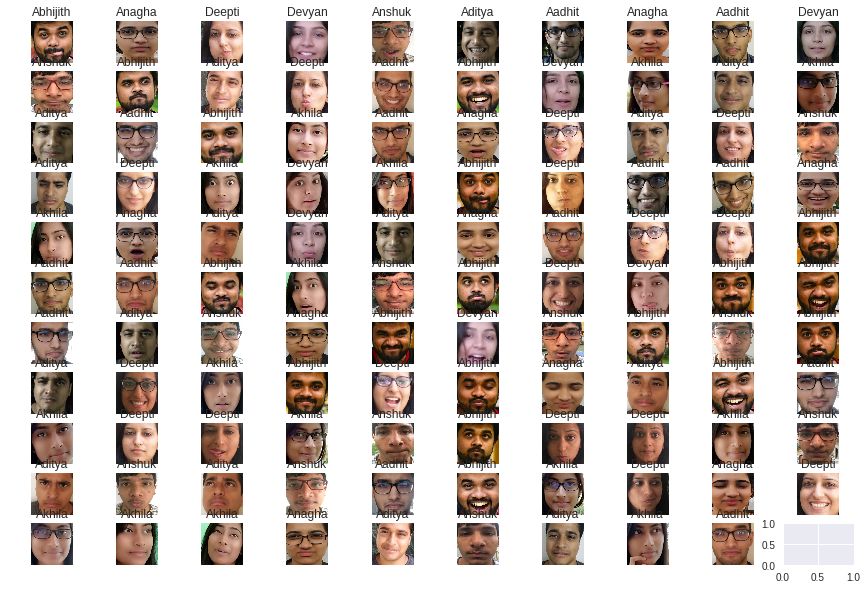

In [0]:
printimages(avrimages,avrlabels)

***Splitting Data into tarining, validation and testing***

In [0]:
(trainimages, testimages, trainlabels, testlabels) = train_test_split(
avrimages, avrlabels, test_size=0.10, random_state=42)

# (trainimages, valimages, trainlabels, vallabels) = train_test_split(
# trainimages, trainlabels, test_size=0.20, random_state=42)


In [0]:
def PCA_Image(Image):
#     A=A.T
    # calculate the mean of each column
#     M = mean(A, axis=1)
#     print(np.array(M).shape)
# center columns by subtracting column means
#     C = A - M
#     print(C)
    # calculate covariance matrix of centered matrix
    Cov_Img = np.cov(Image)
#     V = A.dot(A.T)
#     print(V)
    # eigendecomposition of covariance matrix
    eigvalues, eigvectors = np.linalg.eig(Cov_Img)
#     print(vectors)
#     print(values)
    # project data
    P = eigvectors.T.dot(Image)
#     print(P.T)
    return P,P

In [28]:
# Gabor Wavelet and PCA
def GWPCA(imageset):
    filters = build_filters()
    gw =[]
    img_len = 50
    img_vstack=[]
    for i in range(len(imageset)):
        img = imageset[i]
        res = process(img, filters)
#         res = img.copy()
        res = cv2.resize(res,(img_len,img_len))
#         gw.append(res)
        img_hstack=[]
#         img_vstack.append(np.array(res.flatten()))
        for ind in range(img_len):
            img_hstack.extend(res[ind])
#             print(np.array(img_hstack).shape)
        img_vstack.append(img_hstack)
    print(np.array(img_vstack).shape)

#     resimg = res1.copy()
#     pca=PCA(10,whiten=True)  
#     resimg=pca.fit_transform(np.array(img_vstack))
#     weights = resimg.copy()
#     eigenfaces = resimg
#     print(np.array(resimg).shape)
#     print(resimg)
#     resimg = cv2.resize(resimg,(50,50))
#     mean, resimg = cv2.PCACompute(resimg, mean=None, maxComponents=2)

    weights,resimg = PCA_Image(np.array(img_vstack))
    print(np.array(resimg).shape)
    eigenfaces=[]
    for i in range(len(resimg)):
        img = resimg[i].copy()
        eigenface=[]
        eigenface = img.reshape(img_len,img_len)
        eigenfaces.append(eigenface)
    print(np.array(eigenfaces).shape)

    return weights,eigenfaces

train_vstack, train_ef = GWPCA(trainimages)
# val_vstack, val_ef = GWPCA(valimages)
test_vstack, test_ef = GWPCA(testimages)


def sorteigenvectors(weightlist):
    weight=[]
    for i in range(len(weightlist)):
        st0=sorted(weightlist[i],reverse=True)
        weight.append(st0)
#     print(np.array(weight).shape)
    return weight

train_evsorted = np.array(sorteigenvectors(train_vstack))
# print(train_evsorted[0:10])
# val_evsorted = np.array(sorteigenvectors(val_vstack))
# print(val_evsorted[0:10])
test_evsorted = np.array(sorteigenvectors(test_vstack))
# print(test_evsorted[0:10])


(97, 2500)
(97, 2500)
(97, 50, 50)
(11, 2500)
(11, 2500)
(11, 50, 50)


11


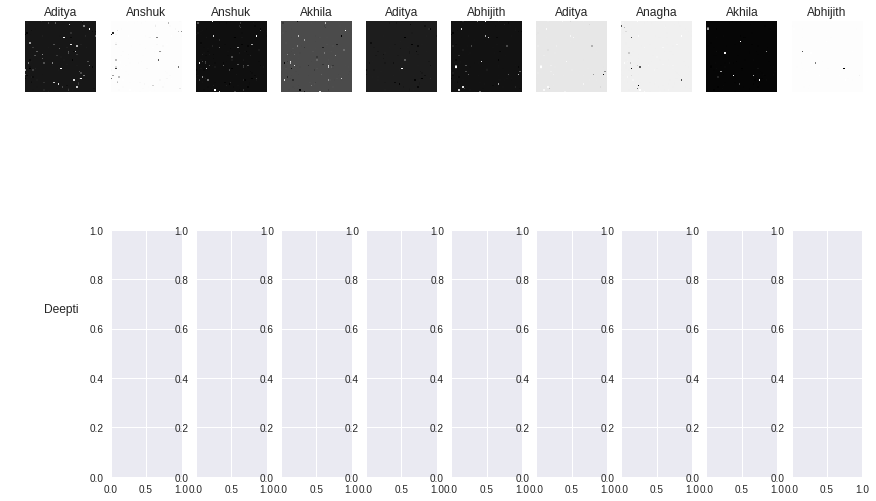

In [24]:
printimages(test_ef,testlabels)

17


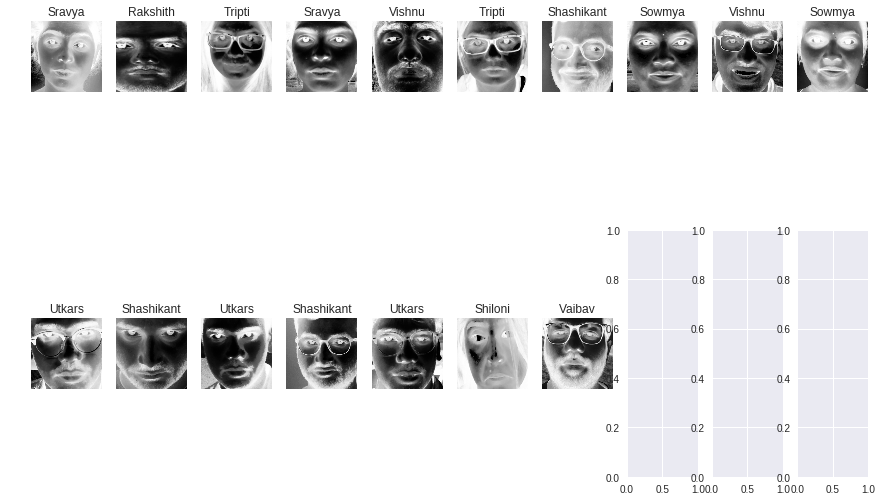

In [0]:
printimages(testimages,testlabels)

In [0]:
def val_test_SVM(train_vstack_maxk,trainlabels,check_vstack_maxk,checklabels):
    dist=[]
#     for c in range(-4,1,1):
    clf = SVC(C=8,degree=10, gamma=0.001,decision_function_shape="ovr")
    clf.fit(train_vstack_maxk, trainlabels)
    checklbl = clf.predict(check_vstack_maxk)
    f1 = accuracy_score(checklbl,checklabels)
    print(f1)
    # print(vallbl)


In [12]:

for topkval in range(1,35):
    print("Selected Eigen faces : ",topkval)
    train_vstack_maxk = train_evsorted[:,0:topkval]
#     val_vstack_maxk = val_evsorted[:,0:topkval]
    test_vstack_maxk = test_evsorted[:,0:topkval]
    
    val_test_SVM(train_vstack_maxk,trainlabels,test_vstack_maxk,testlabels)


Selected Eigen faces :  1
0.09090909090909091
Selected Eigen faces :  2
0.36363636363636365
Selected Eigen faces :  3
0.2727272727272727
Selected Eigen faces :  4
0.2727272727272727
Selected Eigen faces :  5
0.36363636363636365
Selected Eigen faces :  6
0.45454545454545453
Selected Eigen faces :  7
0.36363636363636365
Selected Eigen faces :  8
0.2727272727272727
Selected Eigen faces :  9
0.2727272727272727
Selected Eigen faces :  10
0.2727272727272727
Selected Eigen faces :  11
0.18181818181818182
Selected Eigen faces :  12
0.18181818181818182
Selected Eigen faces :  13
0.18181818181818182
Selected Eigen faces :  14
0.18181818181818182
Selected Eigen faces :  15
0.18181818181818182
Selected Eigen faces :  16
0.18181818181818182
Selected Eigen faces :  17
0.18181818181818182
Selected Eigen faces :  18
0.2727272727272727
Selected Eigen faces :  19
0.2727272727272727
Selected Eigen faces :  20
0.2727272727272727
Selected Eigen faces :  21
0.2727272727272727
Selected Eigen faces :  22
0.27

***Gender Recognition***

11


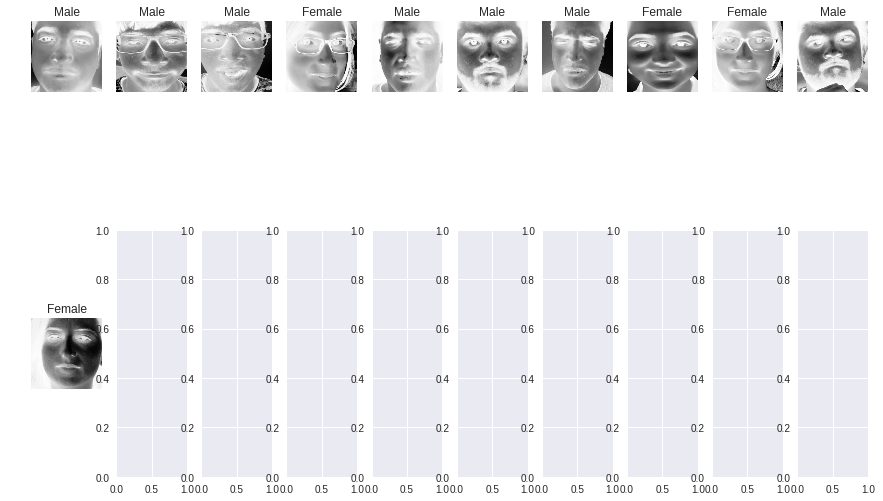

In [30]:
def genderlabels(labelslist):
    Male = ["Abhira","Aadhit","Anshuk","Aditya","Abhijith","Aadhithya","Abhiramon","Ankush","Harsha","Hatim","Himank","Karthik",
           "Mahesh","Naman","Palash","Pranav","Pranith","Rachit","Rakshith","Ravi","Rohil","SaiPradeep","Shabaz",
           "Shashikant","Shivang","Sravya","Vivek","Vishnu","Vamsi","Vaibhav","Utkarsh","Utkars","Suraj","Aadhit"]
    Female=["Akhila","Anagha","Deepika","Deepti","Devyani","Devyan","Juhi","Nehal","Prachi","Pragya","Shiloni",
            "Sowmya","Tripti"]
    genlabels=[]
    for i in range(len(labelslist)):
        if labelslist[i] in Male:
            genlabels.append("Male")
        elif labelslist[i] in Female:
            genlabels.append("Female")
        else:
            genlabels.append("None")
    return genlabels
testgenlbl = genderlabels(testlabels)
printimages(testimages,testgenlbl)

In [0]:
# valgenlbl = genderlabels(vallabels)
traingenlbl = genderlabels(trainlabels)
testgenlbl = genderlabels(testlabels)

In [16]:
for topkval in range(1,50,2):
    print("Selected Eigen faces : ",topkval)
    train_vstack_maxk = train_evsorted[:,0:topkval]
#     val_vstack_maxk = val_evsorted[:,0:topkval]
    test_vstack_maxk = test_evsorted[:,0:topkval]
    
    val_test_SVM(train_vstack_maxk,traingenlbl,test_vstack_maxk,testgenlbl)

Selected Eigen faces :  1
0.45454545454545453
Selected Eigen faces :  3
0.5454545454545454
Selected Eigen faces :  5
0.5454545454545454
Selected Eigen faces :  7
0.7272727272727273
Selected Eigen faces :  9
0.7272727272727273
Selected Eigen faces :  11
0.6363636363636364
Selected Eigen faces :  13
0.6363636363636364
Selected Eigen faces :  15
0.7272727272727273
Selected Eigen faces :  17
0.7272727272727273
Selected Eigen faces :  19
0.7272727272727273
Selected Eigen faces :  21
0.7272727272727273
Selected Eigen faces :  23
0.8181818181818182
Selected Eigen faces :  25
0.7272727272727273
Selected Eigen faces :  27
0.7272727272727273
Selected Eigen faces :  29
0.7272727272727273
Selected Eigen faces :  31
0.7272727272727273
Selected Eigen faces :  33
0.7272727272727273
Selected Eigen faces :  35
0.7272727272727273
Selected Eigen faces :  37
0.7272727272727273
Selected Eigen faces :  39
0.7272727272727273
Selected Eigen faces :  41
0.6363636363636364
Selected Eigen faces :  43
0.636363636

In [32]:
# svc = SVC(C=8.,degree=4, gamma=0.001,probability=True,decision_function_shape="ovo")
# abc = AdaBoostClassifier(n_estimators=150,base_estimator=svc,learning_rate=1)
# for topkval in range(1,50,2):
#     print("Selected Eigen faces : ",topkval)
#     train_vstack_maxk = train_evsorted[:,0:topkval]
# #     val_vstack_maxk = val_evsorted[:,0:topkval]
#     test_vstack_maxk = test_evsorted[:,0:topkval]    
#     model = abc.fit(train_vstack_maxk,traingenlbl)
#     pred = model.predict(test_vstack_maxk)
#     print(accuracy_score(pred,testgenlbl))
for topkval in range(1,50,2):
    print("Selected Eigen faces : ",topkval)
    train_vstack_maxk = train_evsorted[:,0:topkval]
#     val_vstack_maxk = val_evsorted[:,0:topkval]
    test_vstack_maxk = test_evsorted[:,0:topkval]
    
    val_test_SVM(train_vstack_maxk,traingenlbl,test_vstack_maxk,testgenlbl)

Selected Eigen faces :  1
0.6363636363636364
Selected Eigen faces :  3
0.7272727272727273
Selected Eigen faces :  5
0.9090909090909091
Selected Eigen faces :  7
0.9090909090909091
Selected Eigen faces :  9
0.9090909090909091
Selected Eigen faces :  11
0.9090909090909091
Selected Eigen faces :  13
0.9090909090909091
Selected Eigen faces :  15
0.9090909090909091
Selected Eigen faces :  17
0.9090909090909091
Selected Eigen faces :  19
0.9090909090909091
Selected Eigen faces :  21
0.8181818181818182
Selected Eigen faces :  23
0.8181818181818182
Selected Eigen faces :  25
0.8181818181818182
Selected Eigen faces :  27
0.8181818181818182
Selected Eigen faces :  29
0.8181818181818182
Selected Eigen faces :  31
0.8181818181818182
Selected Eigen faces :  33
0.8181818181818182
Selected Eigen faces :  35
0.8181818181818182
Selected Eigen faces :  37
0.8181818181818182
Selected Eigen faces :  39
0.8181818181818182
Selected Eigen faces :  41
0.8181818181818182
Selected Eigen faces :  43
0.8181818181

In [0]:
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [0]:

# for each_image in items:
# #   if each_image.endswith(".jpg"):
#     print (each_image)

***Detecting face and its parts***

In [0]:
def image_part(img):
  # full_path = "/content/Abhijith_CI_01.jpg"
  arri=arrj=0
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

#   img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#   f,arr= plt.subplots(2,4,figsize=(15,10))
#   arr[arri,arrj].imshow(img)
#   arrj+=1
  Det = dlib.get_frontal_face_detector()
  faces = Det(img,0)
#   print(faces)
  for face in faces:
    x = face.left()
    w = face.right()
    y = face.top()
    h = face.bottom()
    if x*w*y*h>0:
      imgfaces = img[y:h,x:w].copy()
#       arr[arri,arrj].imshow(imgfaces)
#       arrj+=1

#   print(type(img))
#   imgfaces=img.copy()
#   clone = imgfaces.copy()
      mouth=[]
      jaw=[]



      for (i, rect) in enumerate(faces):
      # determine the facial landmarks for the face region, then
      # convert the landmark (x, y)-coordinates to a NumPy array

          shape1 = predictor(imgfaces,faces[0])

          shape = face_utils.shape_to_np(shape1)

          # loop over the face parts individually
          for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
          # display the name of the face part on the image
            (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
            mouth.extend((name,x,y,w,h))
    #         print(name,x,y,w,h)
            roi = img[y:y + h, x:x + w]
      #       roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

            # show the particular face part
            if name == "mouth" or name == "jaw" or name == "nose":
              if name == "nose":
                xn= x
                yn=y
                wn=w
                hn=h
              if name == "jaw":
                roi= img[(yn+hn):y+h,x:x+w]
                jaw=roi
                return jaw
    #           arr[arri,arrj].imshow(roi)
    #           arr[arri,arrj].set_title(name)
    #           arrj+=1
    #           arr[arri,arrj].imshow(clone)
    #           arr[arri,arrj].set_title(name)
    #           arrj+=1
    #           if arrj==4:
    #             arri+=1
    #             arrj=0

    #   print(shape1.num_parts)
    #   print(shape1.parts)
    #   print(shape1.rect)
    #   np.array(shape).shape
    #   np.array(mouth).shape

[]
[]


ValueError: ignored

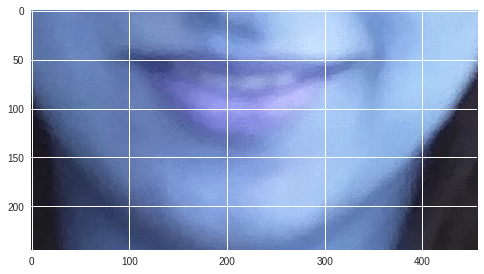

In [0]:
full_path = "/content/Deepti_CO_10.jpg"
img = cv2.imread(full_path)
plt.imshow(image_part(img))

# # print(np.array(trainimages).shape)
jawimages=[]
jawlbl=[]
for i in range(len(trainimages)):
  jimage = image_part(trainimages[i])
#   jimage = cv2.resize(jimage,(250,250))
  if jimage is not None not jimage :
#     if not jimage:
      print(jimage)
      jawimages.append(jimage)

In [0]:
# f, arr = plt.subplots(math.ceil(len(jawimages)/10),10,figsize=(15,10))
# ind=count=0
# for i in range(len(jawimages)):
#     arr[ind,count].imshow(jawimages[i])
# #         arr[ind,count].set_title(avrlabels[i])
#     arr[ind,count].axis('off')
#     count=count+1
#     if count%10==0:
#         ind=ind+1
#         count=0
# plt.show()
np.array(jawimages).shape

(589,)